## **Loading Dataset**


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train_all_tasks.csv to train_all_tasks (4).csv


In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['train_all_tasks.csv']))
print(df)

                      rewire_id  \
0       sexism2022_english-7358   
1       sexism2022_english-2367   
2       sexism2022_english-3073   
3      sexism2022_english-14895   
4       sexism2022_english-4118   
...                         ...   
13995  sexism2022_english-14185   
13996  sexism2022_english-18629   
13997   sexism2022_english-3320   
13998  sexism2022_english-13309   
13999  sexism2022_english-12402   

                                                    text label_sexist  \
0                  Damn, this writing was pretty chaotic   not sexist   
1      Yeah, and apparently a bunch of misogynistic v...   not sexist   
2           How the FUCK is this woman still an MP!!!???   not sexist   
3      Understand. Know you're right. At same time I ...   not sexist   
4         Surprized they didn't stop and rape some women   not sexist   
...                                                  ...          ...   
13995  complexes like the 'nice chicks' that go after...       sexis

## **Analysing Dataset**



In [ ]:
df.drop(['rewire_id', 'label_category', 'label_vector'], inplace = True, axis = 1)

In [ ]:
data = df.dropna()
print(data)

                                                    text label_sexist
0                  Damn, this writing was pretty chaotic   not sexist
1      Yeah, and apparently a bunch of misogynistic v...   not sexist
2           How the FUCK is this woman still an MP!!!???   not sexist
3      Understand. Know you're right. At same time I ...   not sexist
4         Surprized they didn't stop and rape some women   not sexist
...                                                  ...          ...
13995  complexes like the 'nice chicks' that go after...       sexist
13996  "GRAPHIC Germany - Muslim "refugee" stabbing h...   not sexist
13997  Lol I imagine there would be simps that are li...   not sexist
13998  It's not, the girls I go on dates with don't k...   not sexist
13999  How can he be an incel? He does have a girlfri...   not sexist

[14000 rows x 2 columns]


In [ ]:

from sklearn.model_selection import train_test_split
import string
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
data.groupby('label_sexist').describe()

text                                                            \
              count unique                                                top   
label_sexist                                                                    
not sexist    10602  10602              Damn, this writing was pretty chaotic   
sexist         3398   3398  just the inside of your wallet: cash, bank car...   

                   
             freq  
label_sexist       
not sexist      1  
sexist          1

In [ ]:
df_sexist = data[data['label_sexist']=='sexist']
df_sexist.shape

(3398, 2)

In [ ]:
df_non_sexist = data[data['label_sexist']=='not sexist'].sample(df_sexist.shape[0])
df_non_sexist.shape

(3398, 2)

In [ ]:
new_data = pd.concat([df_sexist,df_non_sexist])
del df_non_sexist
del df_sexist
new_data.to_csv('balancedDataset.csv')

In [ ]:
data = pd.read_csv('balancedDataset.csv')
print(data)

      Unnamed: 0                                               text  \
0              8  just the inside of your wallet: cash, bank car...   
1             11  They get the initial chance because they are a...   
2             17                    ugly chicks A pussy is a pussy.   
3             18  fuck her off with a nine mm this is what you g...   
4             19  How about I talk shit to an idiot like you? Ar...   
...          ...                                                ...   
6791         694  Portly Portland. God that place is a dumpster ...   
6792         796               He's in touch with his feminine side   
6793        2777  Best guess, practicality as relates to usage h...   
6794        8877  Critical Theory necessarily requires direct in...   
6795       11623  Good read. I'm going through these problems cu...   

     label_sexist  
0          sexist  
1          sexist  
2          sexist  
3          sexist  
4          sexist  
...           ...  
6791   

In [ ]:
data.groupby('label_sexist').describe()

Unnamed: 0                                                  \
                  count         mean          std  min      25%     50%   
label_sexist                                                              
not sexist       3398.0  6954.201589  4026.087790  5.0  3500.75  6912.0   
sexist           3398.0  6966.171277  4034.101453  8.0  3454.25  6887.5   

                                 
                   75%      max  
label_sexist                     
not sexist    10459.75  13998.0  
sexist        10486.75  13995.0

In [ ]:
data['label_sexist'] = data['label_sexist'].replace(['not sexist'], 0)
data['label_sexist'] = data['label_sexist'].replace(['sexist'], 1)

In [ ]:
print(data)

      Unnamed: 0                                               text  \
0              8  just the inside of your wallet: cash, bank car...   
1             11  They get the initial chance because they are a...   
2             17                    ugly chicks A pussy is a pussy.   
3             18  fuck her off with a nine mm this is what you g...   
4             19  How about I talk shit to an idiot like you? Ar...   
...          ...                                                ...   
6791         694  Portly Portland. God that place is a dumpster ...   
6792         796               He's in touch with his feminine side   
6793        2777  Best guess, practicality as relates to usage h...   
6794        8877  Critical Theory necessarily requires direct in...   
6795       11623  Good read. I'm going through these problems cu...   

      label_sexist  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  


## **Training Dataset**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'],data['label_sexist'], stratify=data['label_sexist'])

In [ ]:
print("X Training data: ",(X_train.shape))
print("X Test data: ",(X_test.shape))
print("y Training data: ",(y_train.shape))
print("y Training data: ",(y_test.shape))

X Training data:  (5097,)
X Test data:  (1699,)
y Training data:  (5097,)
y Training data:  (1699,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train1 = vectorizer.transform(X_train)
X_test1  = vectorizer.transform(X_test)
X_train1

<5097x11875 sparse matrix of type '<class 'numpy.int64'>'
	with 105382 stored elements in Compressed Sparse Row format>

## **Logistic Regression Model**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train1, y_train)
score = classifier.score(X_test1, y_test)
print('Accuracy of Logistic Regression model: ', score)

Accuracy of Logistic Regression model:  0.75927015891701


In [ ]:
predicted_y = classifier.predict(X_test1)
predicted_y = predicted_y.flatten()

In [ ]:
predicted_y = np.where(predicted_y > 0.5, 1, 0)
predicted_y

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
cm = confusion_matrix(y_test, predicted_y)
cm


array([[668, 182],
       [227, 622]])

Text(50.722222222222214, 0.5, 'Truth')

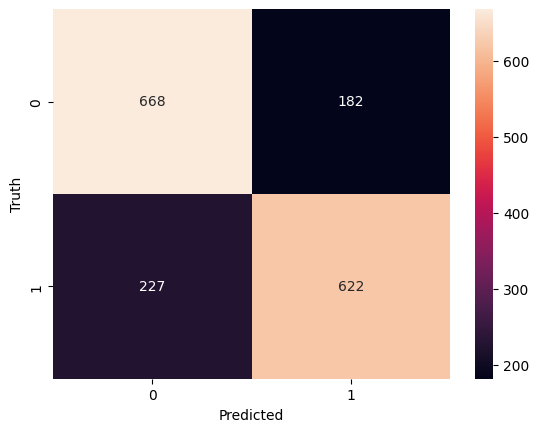

In [ ]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       850
           1       0.77      0.73      0.75       849

    accuracy                           0.76      1699
   macro avg       0.76      0.76      0.76      1699
weighted avg       0.76      0.76      0.76      1699



## **Naive Bayes Model**

In [ ]:
classifier2 = MultinomialNB()
classifier2.fit(X_train1, y_train)
score2 = classifier2.score(X_test1, y_test)
print('Accuracy of Naive-Bayes model: ', score2)

Accuracy of Naive-Bayes model:  0.7039434961742201


In [ ]:
predicted_y1 = classifier2.predict(X_test1)
predicted_y1 = predicted_y1.flatten()

In [ ]:
predicted_y1 = np.where(predicted_y1 > 0.5, 1, 0)
predicted_y1

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
cm1 = confusion_matrix(y_test, predicted_y1)
cm1


array([[482, 368],
       [135, 714]])

Text(50.722222222222214, 0.5, 'Truth')

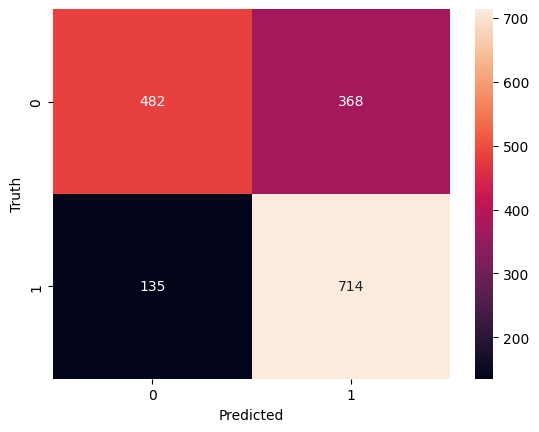

In [ ]:
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, predicted_y1))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66       850
           1       0.66      0.84      0.74       849

    accuracy                           0.70      1699
   macro avg       0.72      0.70      0.70      1699
weighted avg       0.72      0.70      0.70      1699



## **Neural Network Model** 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
MAX_WORDS = 10000


tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

MAX_SEQ_LENGTH = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=MAX_SEQ_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=MAX_SEQ_LENGTH, padding='post', truncating='post')

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=64, input_length=MAX_SEQ_LENGTH))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Accuracy of Neural Network Model:', accuracy)

Epoch 1/10
160/160 [==============================] - 29s 153ms/step - loss: 0.6937 - accuracy: 0.4879 - val_loss: 0.6932 - val_accuracy: 0.5003
Epoch 2/10
160/160 [==============================] - 24s 148ms/step - loss: 0.6933 - accuracy: 0.5134 - val_loss: 0.6932 - val_accuracy: 0.5003
Epoch 3/10
160/160 [==============================] - 24s 147ms/step - loss: 0.6933 - accuracy: 0.4830 - val_loss: 0.6932 - val_accuracy: 0.5003
Epoch 4/10
160/160 [==============================] - 23s 141ms/step - loss: 0.6935 - accuracy: 0.4917 - val_loss: 0.6932 - val_accuracy: 0.5003
Epoch 5/10
160/160 [==============================] - 22s 135ms/step - loss: 0.6934 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.5003
Epoch 6/10
160/160 [==============================] - 24s 148ms/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6932 - val_accuracy: 0.5003
Epoch 7/10
160/160 [==============================] - 23s 147ms/step - loss: 0.6932 - accuracy: 0.4936 - val_loss: 0.6932 - val_ac

## **TASK B**

## **Multi Class Logistic Regression Model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model_b = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_b.fit(X_train1, y_train)


y_pred_b = model_b.predict(X_test1)
accuracy_b = accuracy_score(y_test, y_pred_b)
precision_b = precision_score(y_test, y_pred_b, average='weighted')
recall_b = recall_score(y_test, y_pred_b, average='weighted')
f1_b = f1_score(y_test, y_pred_b, average='weighted')

print("\nTask B: Category of Sexism")
print("Accuracy:", accuracy_b)
print("Precision:", precision_b)
print("Recall:", recall_b)
print("F1-score:", f1_b)


Task B: Category of Sexism
Accuracy: 0.7469099470276633
Precision: 0.7470503866402091
Recall: 0.7469099470276633
F1-score: 0.7468766253980936
